In [1]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
palette = sns.color_palette()

In [3]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
setosa = iris[iris['species'] == 'setosa']
virginica = iris[iris['species'] == 'virginica']

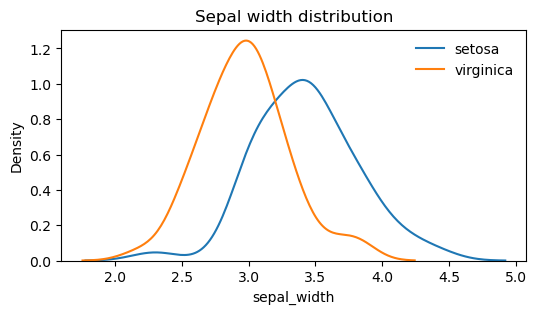

In [5]:
plt.figure(figsize=(6,3))
plt.title(f'Sepal width distribution')
sns.kdeplot(data=setosa,x='sepal_width',color=palette[0],label='setosa');
sns.kdeplot(data=virginica,x='sepal_width',color=palette[1],label='virginica');
plt.legend(frameon=False)
plt.show()

### Are the sepal widths significantly different between _setosa_ and _virginica_?

In [144]:
t_stat_stats, p_value_stats = stats.ttest_ind(setosa['sepal_width'], virginica['sepal_width'], )
t_stat_stats, p_value_stats

(6.45034908963073, 4.2463553818449584e-09)

In [145]:
virginica_mean = virginica['sepal_width'].mean()
virginica_std = virginica['sepal_width'].std()
virginica_n = virginica['sepal_width'].shape[0]
virginica_df = virginica_n-1
virginica_sem = virginica_std/np.sqrt(virginica_n)

#########################

setosa_mean = setosa['sepal_width'].mean()
setosa_std = setosa['sepal_width'].std()
setosa_n = setosa['sepal_width'].shape[0]
setosa_df = setosa_n-1
setosa_sem = setosa_std/np.sqrt(setosa_n)

virginica_mean, setosa_mean

(2.974, 3.428)

In [146]:
pooled_variance = (setosa_std**2) + (virginica_std**2)
pooled_variance

0.24769387755102043

In [147]:
SEM = np.sqrt((( (setosa_std**2)/setosa_n ) + ( (virginica_std**2)/virginica_n )))
SEM

0.07038378755807624

In [148]:
t_val = (setosa_mean-virginica_mean)/SEM
t_val, t_val == t_stat_stats

(6.45034908963073, True)

In [149]:
t_crit = stats.t.ppf(1 - 0.05/2, df=setosa_df+virginica_df)
t_crit

1.984467454426692

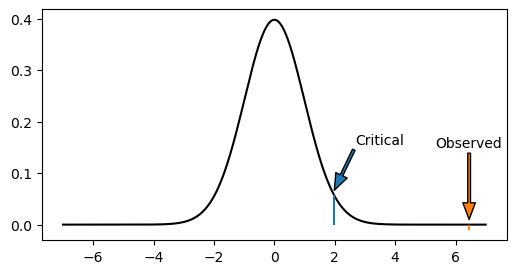

In [152]:
## Draw t-distr

plt.figure(figsize=(6,3))
x = np.linspace(-7, 7, 1000)
t_dist_df = stats.t.pdf(x, df=setosa_df+virginica_df)
plt.plot(x, t_dist_df, label=f't-distribution df={setosa_df+virginica_df}',color='black')


plt.vlines(t_crit, 0, stats.t.pdf(t_crit, setosa_df+virginica_df),color=palette[0],label='critical t-value')
plt.vlines(t_val, 0, -1 * .01+stats.t.pdf(t_val, setosa_df+virginica_df),color=palette[1],label='observed t-value')


plt.annotate(
    'Critical',
    ha='center',
    xy=(t_crit, .01+stats.t.pdf(t_crit, setosa_df+virginica_df)), 
    xytext=(t_crit+1.5, .1+stats.t.pdf(t_crit, setosa_df+virginica_df)),
    arrowprops=dict(facecolor=palette[0], width=2, headwidth=9)
)


plt.annotate(
    'Observed',
    ha='center',
    xy=(t_val, .01+stats.t.pdf(t_val, setosa_df+virginica_df)), 
    xytext=(t_val, 0.15),
    arrowprops=dict(facecolor=palette[1], width=2,headwidth=9)
)

plt.show()

In [153]:
p_val = 1 - stats.t.cdf(t_val, setosa_df+virginica_df)
p_val*2, np.isclose(p_val*2 , p_value_stats)

(4.2463552674121274e-09, True)

In [154]:
p_value_stats

4.2463553818449584e-09

In [14]:
# stats uses the survival function which is the complement of the CDF
stats.distributions.t.sf(t_val,setosa_df+virginica_df) * 2 == p_value_stats

True

In [40]:
# 95% confidence interval of the difference in means.
(setosa_mean - virginica_mean) - (t_crit * SEM), (setosa_mean - virginica_mean) + (t_crit * SEM)

(0.3143256642717151, 0.5936743357282843)

In [164]:
4/1e9

4e-09

In [162]:
4/1 000 000 000

4e-09

----


### One tailed t-tests

In a two-tailed test we ask if the means are significantly different, but don't specify in what direction:

In [173]:
t_stat_stats, p_value_stats = stats.ttest_ind(setosa['sepal_width'], virginica['sepal_width'],alternative='two-sided')
t_stat_stats, p_value_stats

(6.45034908963073, 4.2463553818449584e-09)

In [174]:
t_val_two_sided = stats.t.ppf(1 - 0.05/2, df=setosa_df+virginica_df)
t_val_two_sided

1.984467454426692


This is the equivalent of asking: What is the t-value expected at or below 97.5% of the time?

In simpler terms, this t-value is the threshold at which there is only a 2.5% probability of observing a value higher than this t-value (or lower than its negative counterpart) in the t-distribution, assuming the null hypothesis is true.



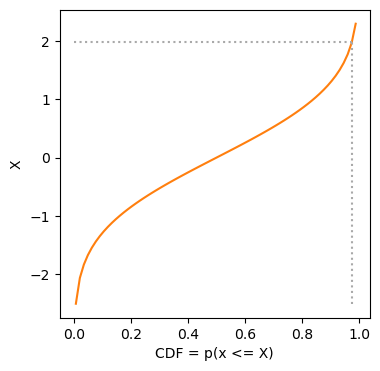

In [205]:
print(

f'''
This is the equivalent of asking: What is the t-value expected at or below {1 - (.05/2):.1%} of the time?

In simpler terms, this t-value is the threshold at which there is only a 2.5% probability of observing a value higher than this t-value (or lower than its negative counterpart) in the t-distribution, assuming the null hypothesis is true.
'''

)


xppf = stats.t.ppf(x, df=setosa_df+virginica_df)

plt.figure(figsize=(4,4))
sns.lineplot(x=x,y=xppf,color=palette[1])

plt.hlines(t_val_two_sided,0,1-0.025, color='darkgray',ls=':')
plt.vlines(1-0.025,-2.5,t_val_two_sided, color='darkgray',ls=':')

plt.ylabel('X')
plt.xlabel('CDF = p(x <= X)')
plt.show()

In [277]:
from IPython.display import display, Markdown

\
                 \
                 We ask for the t-critical value at $\frac{\alpha}{2}$ since we want to account for values smaller or larger than the critical value.   \
                 This only works because the distribution is symmetrical. \
                 \
                 `t_val_two_sided = stats.t.ppf(1 - 0.05/2, df=setosa_df+virginica_df)` is ~1.98.\
                 \
                    * We would expect to observe a t-value greater than 1.98 in 2.5% of the cases.\
                    * Similarly, we would expect to observe a t-value less than -1.98 (the negative counterpart) in another 2.5% of the cases.\
                 \
                 In total, for a two-tailed test with a significance level of 0.05, we expect 5% of the t-values to be as extreme as or more extreme than the critical t-value (either greater than 1.98 or less than -1.98). \
                 This is consistent with the idea that 95% of the t-values will lie between -1.98 and 1.98.\
                 

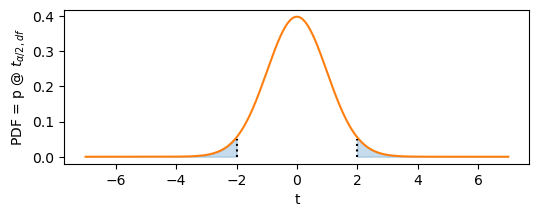

In [276]:
display(Markdown(r'\
                 \
                 We ask for the t-critical value at $\frac{\alpha}{2}$ since we want to account for values smaller or larger than the critical value.   \
                 This only works because the distribution is symmetrical. \
                 \
                 `t_val_two_sided = stats.t.ppf(1 - 0.05/2, df=setosa_df+virginica_df)` is ~1.98.\
                 \
                    * We would expect to observe a t-value greater than 1.98 in 2.5% of the cases.\
                    * Similarly, we would expect to observe a t-value less than -1.98 (the negative counterpart) in another 2.5% of the cases.\
                 \
                 In total, for a two-tailed test with a significance level of 0.05, we expect 5% of the t-values to be as extreme as or more extreme than the critical t-value (either greater than 1.98 or less than -1.98). \
                 This is consistent with the idea that 95% of the t-values will lie between -1.98 and 1.98.\
                 '))



xpdf = stats.t.pdf(x, df=setosa_df+virginica_df)

plt.figure(figsize=(6,2))
ax = sns.lineplot(x=x,y=xpdf,color=palette[1])

#plt.hlines(t_val_two_sided,0,1-0.025, color='darkgray',ls=':')
plt.vlines(t_val_two_sided,0,0.05, color='black',ls=':')
plt.vlines(-t_val_two_sided,0,0.05, color='black',ls=':')

x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x <= -t_val_two_sided), color=palette[0], alpha=0.25)

x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x >= t_val_two_sided), color=palette[0], alpha=0.25)

plt.xlabel('t')
plt.ylabel(r'PDF = p @ $t_{\alpha/2,df}$')
plt.show()

### Right-tailed test

$H_a$: The mean of _setosa_ is **greater** than _virginica_

In [488]:

t_stat_stats_greater, p_value_stats_greater = stats.ttest_ind(setosa['sepal_width'], virginica['sepal_width'],alternative='greater')
t_stat_stats_greater, p_value_stats_greater

(6.45034908963073, 2.1231776909224792e-09)

In [439]:
t_val_greater = stats.t.ppf(1 - 0.05, df=setosa_df+virginica_df)
t_val_greater

1.6605512170440568

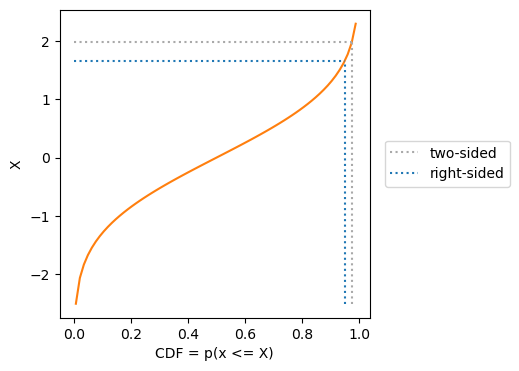

In [440]:
xppf = stats.t.ppf(x, df=setosa_df+virginica_df)

plt.figure(figsize=(4,4))
sns.lineplot(x=x,y=xppf,color=palette[1])

plt.hlines(t_val_two_sided,0,1-0.025, color='darkgray',ls=':',label='two-sided')
plt.vlines(1-0.025,-2.5,t_val_two_sided, color='darkgray',ls=':')

plt.hlines(t_val_greater,0,1-0.05, color=palette[0] ,ls=':' ,label='right-sided')
plt.vlines(1-0.05,-2.5,t_val_greater, color=palette[0], ls=':')


plt.legend(bbox_to_anchor=(1.25,0.5),loc='center')
plt.ylabel('X')
plt.xlabel('CDF = p(x <= X)')
plt.show()

In [489]:
observed_t_value = (setosa_mean-virginica_mean)/SEM
observed_t_value

6.45034908963073

In [497]:
p_value_right_tailed = 1 - stats.t.cdf(observed_t_value, setosa_df+virginica_df)
p_value_right_tailed , np.isclose(p_value_right_tailed, p_value_stats_greater)

(2.1231776337060637e-09, True)

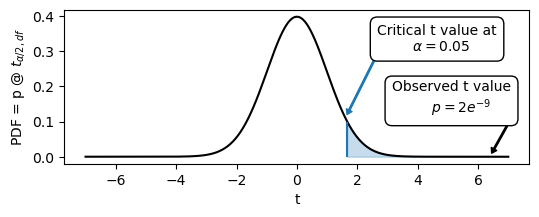

In [499]:
xpdf = stats.t.pdf(x, df=setosa_df+virginica_df)

plt.figure(figsize=(6,2))
ax = sns.lineplot(x=x,y=xpdf,color='black')


#plt.vlines(-t_val_two_sided,0,0.05, color='black',ls=':')
#plt.vlines(t_val_two_sided,0,0.05, color='black',ls=':')

plt.vlines(t_val_greater,0,0.1, color=palette[0],ls='-')

x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x >= t_val_greater), color=palette[0], alpha=0.25)



plt.annotate(
    r'''Critical t value at
        $\alpha=0.05$''',
    ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'),
    xy=(t_val_greater, 0.12), 
    xytext=(t_val_greater+1, 0.3),
    arrowprops=dict(width=1,headlength=3.5, headwidth=4.5,color=palette[0])
)

plt.annotate(
    r'''Observed t value
         $p=2e^{-9}$''',
    ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'),
    xy=(observed_t_value, 0.01), 
    xytext=(3.15, 0.125),
    arrowprops=dict(width=1,headlength=3.5, headwidth=4.5,color='k')
)

plt.xlabel('t')
plt.ylabel(r'PDF = p @ $t_{\alpha/2,df}$')
plt.show()

### Left-tailed test

$H_a$: The mean of _setosa_ is **lower** than _virginica_

In [421]:
t_val_lesser = stats.t.ppf(0.05, df=setosa_df+virginica_df)
t_val_lesser

-1.6605512170440575

In [424]:
observed_t_value = (setosa_mean-virginica_mean)/SEM
observed_t_value

6.45034908963073

In [426]:
p_value_left_tailed = 1 - stats.t.cdf(observed_t_value, setosa_df+virginica_df)
p_value_left_tailed

2.1231776337060637e-09

In [451]:
t_stat_stats, p_value_stats = stats.ttest_ind(setosa['sepal_width'], virginica['sepal_width'],alternative='less')
t_stat_stats, p_value_stats

(6.45034908963073, 0.9999999978768224)

In [452]:
t_val_less = stats.t.ppf(0.05, df=setosa_df+virginica_df)
t_val_less

-1.6605512170440575

In [459]:
stats.t.pdf(observed_t_value, setosa_df+virginica_df)

9.830741594900393e-09

In [453]:
p_value_left_tailed = stats.t.cdf(observed_t_value, setosa_df+virginica_df)
p_value_left_tailed

0.9999999978768224

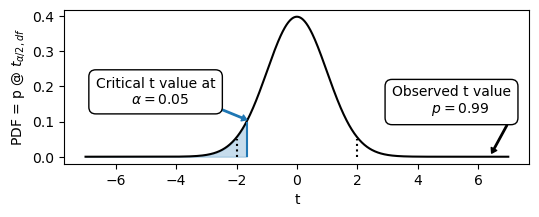

In [454]:
xpdf = stats.t.pdf(x, df=setosa_df+virginica_df)

plt.figure(figsize=(6,2))
ax = sns.lineplot(x=x,y=xpdf,color='black')

#plt.hlines(t_val_two_sided,0,1-0.025, color='darkgray',ls=':')

plt.vlines(t_val_two_sided,0,0.05, color='black',ls=':')
plt.vlines(-t_val_two_sided,0,0.05, color='black',ls=':')

plt.vlines(t_val_lesser,0,0.1, color=palette[0],ls='-')

x, y = ax.lines[0].get_data()
plt.fill_between(x, y, where=(x <= t_val_lesser), color=palette[0], alpha=0.25)



plt.annotate(
    r'''Critical t value at
        $\alpha=0.05$''',
    ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'),
    xy=(t_val_lesser, 0.105), 
    xytext=(t_val_lesser-5, 0.15),
    arrowprops=dict(width=1,headlength=3.5, headwidth=4.5,color=palette[0])
)

plt.annotate(
    r'''Observed t value
         $p=0.99$''',
    ha='left',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'),
    xy=(observed_t_value, 0.01), 
    xytext=(3.15, 0.125),
    arrowprops=dict(width=1,headlength=3.5, headwidth=4.5,color='k')
)

plt.xlabel('t')
plt.ylabel(r'PDF = p @ $t_{\alpha/2,df}$')
plt.show()